<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P6E7ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

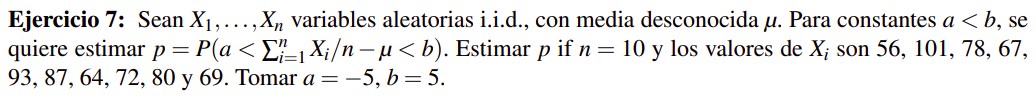

In [40]:
from random import random, seed

MUESTRA = [56, 101, 78, 67, 93, 87, 64, 72, 80, 69]
N = len(MUESTRA)
MEDIA_EMPIRICA = sum(MUESTRA) / N
A, B = -5, 5
N_SIM = 1_000
theta_Fe = A < MEDIA_EMPIRICA - MEDIA_EMPIRICA < B  # theta empitico (θ(Fe)): estimador en la muestra original

def obtener_muestra_bootstrap():
    return [MUESTRA[int(random() * N)] for _ in range(N)]

def experimento_bootstrap_theta():
    xs = obtener_muestra_bootstrap()
    media_muestral = sum(xs) / len(xs)
    return A < media_muestral - MEDIA_EMPIRICA < B

def estimar_bootstrap_theta():
  return sum([experimento_bootstrap_theta() for _ in range(N_SIM)]) / N_SIM

seed(1)
print("Estimador Bootstrap:", estimar_bootstrap_theta(), " = p = P(a < (1/n) * sum(Xi) - mu < b)")

def error_cuadratico_medio_bootstrap():
    estimaciones_bootstrap = [experimento_bootstrap_theta() for _ in range(N_SIM)]
    return sum((theta_j - theta_Fe) ** 2 for theta_j in estimaciones_bootstrap) / N_SIM

seed(1)
print("ECM Bootstrap:", error_cuadratico_medio_bootstrap())
# i.e: Cuán dispersas son las replicaciones bootstrap del estimador respecto
# al valor de ese estimador sobre la muestra original. Eso representa el error
# esperado del estimador si la población tuviera la forma de la muestra original.

Estimador Bootstrap: 0.769
ECM Bootstrap: 0.231


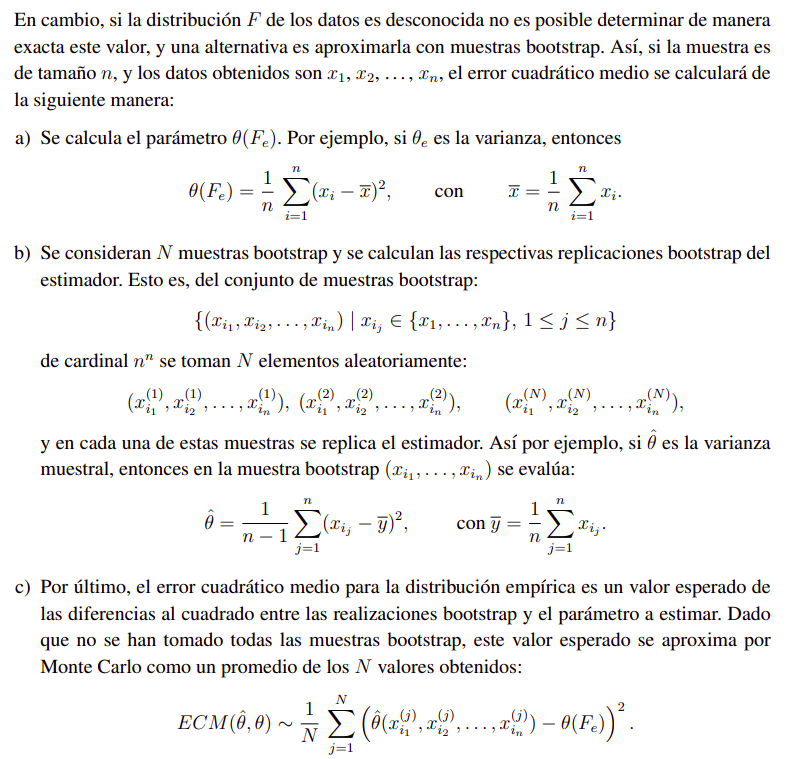